In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 2000)
pd.set_option('display.width', 1000)

In [3]:
df = pd.read_csv('../data/forbes-global-2000-2008-2019/Forbes Global 2000 -  Combined Panel Data.csv', encoding='ISO-8859-1')
df_2022 = df[df['Year'] == 2022].copy()
df_2022[:10]

,Year,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
27993,2022,1,Berkshire Hathaway,Diversified Financials,United States,276094.0,89795.0,958784.0,741476.0
27994,2022,2,ICBC,Banking,China,208127.0,54028.3,5518508.0,214425.0
27995,2022,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376.0,105363.0,576041.0,2292077.0
27996,2022,4,JPMorgan Chase,Diversified Financials,United States,124542.0,42115.0,3954687.0,374446.0
27997,2022,5,China Construction Bank,Banking,China,202069.0,46887.3,4746951.0,181325.0
27998,2022,6,Amazon,Retailing,United States,469822.0,33364.0,420549.0,1468398.0
27999,2022,7,Apple,Technology Hardware & Equipment,United States,378697.0,100555.0,381191.0,2640316.0
28000,2022,8,Agricultural Bank of China,Banking,China,181420.0,37378.5,4561048.0,133385.0
28001,2022,9,Bank of America,Banking,United States,96826.0,30995.0,3238223.0,303102.0
28002,2022,10,Toyota Motor,Consumer Durables,Japan,281746.0,28154.4,552456.0,237726.0


In [4]:
df_2022.dtypes

Year              int64
Rank_nr          object
Company          object
Industry         object
Country          object
Sales           float64
Profits          object
Assets          float64
Market_Value    float64
dtype: object

In [5]:
df_2022['Profits'] = df_2022['Profits'].astype(float)
df_2022.dtypes

Year              int64
Rank_nr          object
Company          object
Industry         object
Country          object
Sales           float64
Profits         float64
Assets          float64
Market_Value    float64
dtype: object

In [6]:
def data_quality_report(df):
    
    if isinstance(df, pd.core.frame.DataFrame):
        
        descriptive_statistics = df.describe(include = 'all')
        data_types = pd.DataFrame(df.dtypes, columns=['Data Type']).transpose()
        missing_value_counts = pd.DataFrame(df.isnull().sum(), columns=['Missing Values']).transpose()
        present_value_counts = pd.DataFrame(df.count(), columns=['Present Values']).transpose()
        data_report = pd.concat([descriptive_statistics, data_types, missing_value_counts, present_value_counts], axis=0)
        
        return data_report
    
    else:
    
        return None

In [7]:
df_2022.describe(include='all')

,Year,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
count,2000.0,2000,2000,2000,2000,2000.000000,2000.000000,2.000000e+03,2.000000e+03
unique,NaN,1685,2000,26,58,NaN,NaN,NaN,NaN
top,NaN,1949,Berkshire Hathaway,Banking,United States,NaN,NaN,NaN,NaN
freq,NaN,4,1,290,584,NaN,NaN,NaN,NaN
mean,2022.0,NaN,NaN,NaN,NaN,23886.202000,2500.655400,1.171142e+05,3.823843e+04
std,0.0,NaN,NaN,NaN,NaN,40942.544294,6159.244654,3.637458e+05,1.172073e+05
min,2022.0,NaN,NaN,NaN,NaN,0.000000,-12052.300000,1.660000e+02,1.440000e+02
25%,2022.0,NaN,NaN,NaN,NaN,5604.000000,589.850000,1.479075e+04,7.325750e+03
50%,2022.0,NaN,NaN,NaN,NaN,12167.500000,1054.750000,3.200700e+04,1.662550e+04
75%,2022.0,NaN,NaN,NaN,NaN,23742.500000,2266.825000,7.787025e+04,3.471200e+04


In [8]:
data_quality_report(df_2022)

,Year,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
count,2000.0,2000,2000,2000,2000,2000.0,2000.0,2000.0,2000.0
unique,NaN,1685,2000,26,58,NaN,NaN,NaN,NaN
top,NaN,1949,Berkshire Hathaway,Banking,United States,NaN,NaN,NaN,NaN
freq,NaN,4,1,290,584,NaN,NaN,NaN,NaN
mean,2022.0,NaN,NaN,NaN,NaN,23886.202,2500.6554,117114.2185,38238.4255
std,0.0,NaN,NaN,NaN,NaN,40942.544294,6159.244654,363745.753098,117207.269875
min,2022.0,NaN,NaN,NaN,NaN,0.0,-12052.3,166.0,144.0
25%,2022.0,NaN,NaN,NaN,NaN,5604.0,589.85,14790.75,7325.75
50%,2022.0,NaN,NaN,NaN,NaN,12167.5,1054.75,32007.0,16625.5
75%,2022.0,NaN,NaN,NaN,NaN,23742.5,2266.825,77870.25,34712.0


In [9]:
df_2022.dropna(inplace=True)
# It is important to reset a zero-based index when dropping rows with missing values although in this case it is not necessary
df_2022.reset_index(drop=True, inplace=True)
data_quality_report(df_2022)

,Year,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
count,2000.0,2000,2000,2000,2000,2000.0,2000.0,2000.0,2000.0
unique,NaN,1685,2000,26,58,NaN,NaN,NaN,NaN
top,NaN,1949,Berkshire Hathaway,Banking,United States,NaN,NaN,NaN,NaN
freq,NaN,4,1,290,584,NaN,NaN,NaN,NaN
mean,2022.0,NaN,NaN,NaN,NaN,23886.202,2500.6554,117114.2185,38238.4255
std,0.0,NaN,NaN,NaN,NaN,40942.544294,6159.244654,363745.753098,117207.269875
min,2022.0,NaN,NaN,NaN,NaN,0.0,-12052.3,166.0,144.0
25%,2022.0,NaN,NaN,NaN,NaN,5604.0,589.85,14790.75,7325.75
50%,2022.0,NaN,NaN,NaN,NaN,12167.5,1054.75,32007.0,16625.5
75%,2022.0,NaN,NaN,NaN,NaN,23742.5,2266.825,77870.25,34712.0


In [10]:
df_2022[:10]

,Year,Rank_nr,Company,Industry,Country,Sales,Profits,Assets,Market_Value
0,2022,1,Berkshire Hathaway,Diversified Financials,United States,276094.0,89795.0,958784.0,741476.0
1,2022,2,ICBC,Banking,China,208127.0,54028.3,5518508.0,214425.0
2,2022,3,Saudi Arabian Oil Company (Saudi Aramco),Oil & Gas Operations,Saudi Arabia,400376.0,105363.0,576041.0,2292077.0
3,2022,4,JPMorgan Chase,Diversified Financials,United States,124542.0,42115.0,3954687.0,374446.0
4,2022,5,China Construction Bank,Banking,China,202069.0,46887.3,4746951.0,181325.0
5,2022,6,Amazon,Retailing,United States,469822.0,33364.0,420549.0,1468398.0
6,2022,7,Apple,Technology Hardware & Equipment,United States,378697.0,100555.0,381191.0,2640316.0
7,2022,8,Agricultural Bank of China,Banking,China,181420.0,37378.5,4561048.0,133385.0
8,2022,9,Bank of America,Banking,United States,96826.0,30995.0,3238223.0,303102.0
9,2022,10,Toyota Motor,Consumer Durables,Japan,281746.0,28154.4,552456.0,237726.0


<Axes: >

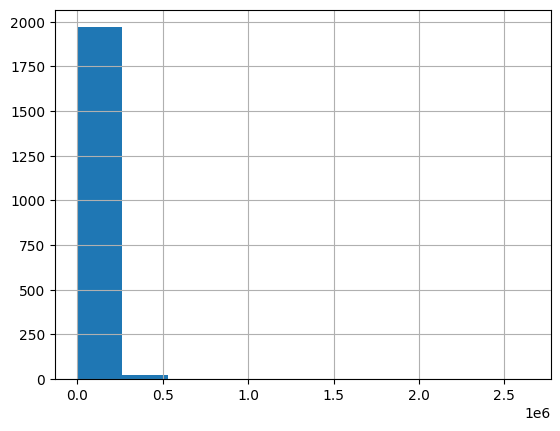

In [11]:
df_2022['Market_Value'].hist()

In [12]:
# Skewness index more than 0 indicates a right skewed distribution
print('Skewness of Market_Value is {}'.format(df_2022['Market_Value'].skew()))

Skewness of Market_Value is 14.447388446435967


<Axes: >

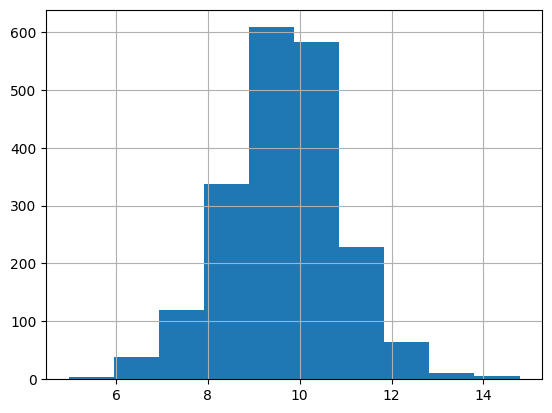

In [13]:
df_2022['Log_Market_Value'] = np.log(df_2022['Market_Value'])
df_2022['Log_Market_Value'].hist()

In [ ]:
# Skewness index close to 0 indicates a normal distribution
print('Skewness of Market_Value is {}'.format(df_2022['Log_Market_Value'].skew()))

Skewness of Market_Value is -0.02737909553765073


In [17]:
df_2022_ivs = df_2022[['Sales', 'Profits', 'Assets', 'Market_Value']]
df_2022_ivs.corr(method='pearson')

,Sales,Profits,Assets,Market_Value
Sales,1.000000,0.644831,0.338267,0.539966
Profits,0.644831,1.000000,0.454873,0.796594
Assets,0.338267,0.454873,1.000000,0.146034
Market_Value,0.539966,0.796594,0.146034,1.000000


<Axes: >

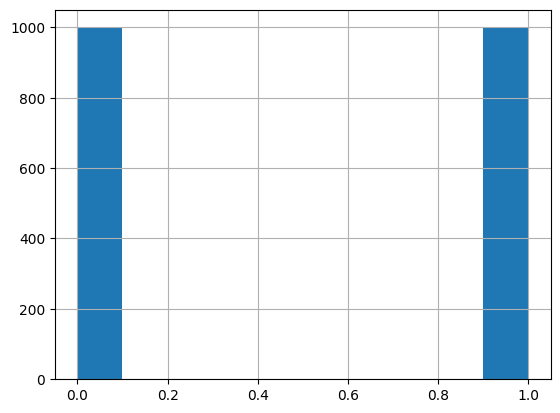

In [18]:
df_2022['Market_Value_Binary'] = np.where(df_2022['Market_Value'] <= df_2022['Market_Value'].median(), 0, 1)
df_2022['Market_Value_Binary'].hist()